In [1]:

# coding: utf-8

import numpy as np
import matplotlib.pyplot as plt
%pylab inline



Populating the interactive namespace from numpy and matplotlib


In [2]:
#- reading inform record ------------------------------------------------------------------------------
ldor0 = 1024
filename='f4.nu'
fid = open(filename, 'rb')

# numpy function 
pole=np.fromfile(fid,dtype='float32',count=ldor0)

# print (pole)

# first python massive index =0 (fortran - 1)
kpars = int(pole[51-1])
nh = int(pole[60-1]); 
print('nh=',nh)

ddolgs = pole[56-1]
dtets = pole[57-1]
print('dtets=',dtets)

ids = int(360.1 / ddolgs)
its = int(180.1 / dtets + 1); 
print (its)


ntr = int(pole[58-1])
ddolgt = pole[54-1]; print ('ddolgt=',ddolgt)
idt = int(360.1 / ddolgt)

nl = int(pole[61-1])
nl2 = nl + nl + 3; 
print (nl2)
#-------------------------------------------------------------------------------
size_zap_p= ntr * idt * nl2
#size_zap_p=42*ldor0 # potential
print (size_zap_p)

#fid.seek(4*ldor0)
potef=np.fromfile(fid,dtype='float32',count=size_zap_p)

fid.seek(4*43*ldor0)
size_zap = kpars * nh * its * ids
pgl0 = np.fromfile(fid,dtype='float32',count=size_zap)
fid.close()
print(len(potef),potef[0],pgl0[0])


('nh=', 30)
('dtets=', 5.0)
37
('ddolgt=', 5.0)
37
42624
(42624, -2.5026072e+11, 7.3999971e+13)


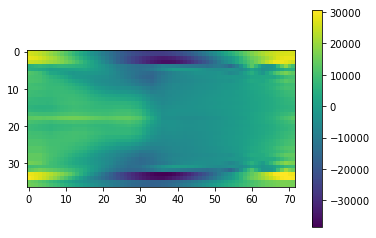

In [3]:
#-------------------------------------------------------------------------------
pgl = pgl0.reshape(ids,its,nh,kpars)
pgl_ris=np.zeros(its*ids).reshape(ids,its)
pgl_ris[:,:] = pgl[:, :, 20,11] # temperature at 80 km
    #[X,Y]=meshgrid(its,ids);
# plt.contourf(pgl_ris.T)
#pgl_ris[71,36] = pgl_ris[70,36]  
#pgl_ris[0,0:3] = 1500.0 #it's here
# plt.imshow(pgl_ris.T[3:,:])
plt.imshow(pgl_ris.T)
plt.colorbar()
#plt.show()

In [4]:
print(pgl_ris[71,36] , pgl_ris[70,36]  )

(16235.0205078125, 16605.810546875)


In [5]:
ntr * idt * nl2

42624

In [6]:
float(ntr * idt * nl2)/1024.

41.625